In [2]:
import os, shutil

### Section 1. Data Arrangement

In this section, we will divide dataset into train and validation. Since, data is so small that's why we are not creating test set. 

#### Note: If your data is already arranged in train and validation sets, you can jump to section 2 of this notebook.

In [3]:
# origianl path to dataset
original_dir = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset'

In [ ]:
# making a new folder inside original directory
base_dir = os.path.join(original_dir, 'splitted_data')
os.mkdir(base_dir)

In [8]:
#creating train and validation directories inside "splitted data" folder

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validati2on')
os.mkdir(validation_dir)

In [11]:
# creating positive and negative folders inside train and validation folders.

train_positive_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_positive_dir)

train_negative_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_negative_dir)

validation_positive_dir = os.path.join(validation_dir, 'positive')
os.mkdir(validation_positive_dir)

validation_negative_dir = os.path.join(validation_dir, 'negative')
os.mkdir(validation_negative_dir)

In [3]:
# To rename the images, I created two new folders named as 'positive_imgs' and 'negative_imgs' and copied them after chaning images names
old_pos_dir = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\positive'
new_pos_dir = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\positive_imgs'

old_neg_dir = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\nagative'
new_neg_dir = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\negative_imgs'

In [14]:
#renaming the images names


file_list = os.listdir(old_pos_dir)

for index, fname in enumerate(file_list): 
    new_filename = f'positive_{index+1}.jpeg'

    old_dir_path = os.path.join(old_pos_dir, fname)
    new_dir_path_2 = os.path.join(new_pos_dir, new_filename)

    os.rename(old_dir_path, new_dir_path_2)

In [15]:
#renaming the images 
file_list = os.listdir(old_neg_dir)

for index, fname in enumerate(file_list): 
    new_filename = f'negative_{index+1}.jpeg'

    old_dir_path = os.path.join(old_neg_dir, fname)
    new_dir_path_2 = os.path.join(new_neg_dir, new_filename)

    os.rename(old_dir_path, new_dir_path_2)

In [19]:
#copying negative images to train folder

fnames = ['negative_{}.jpeg'.format(i+1) for i in range(240)]

for fname in fnames:
    src_dir = os.path.join(new_neg_dir, fname)
    dst_dir = os.path.join(train_negative_dir, fname)
    shutil.copyfile(src_dir, dst_dir)
    

In [20]:
#copying negative images to validation folder

fnames = ['negative_{}.jpeg'.format(i+1) for i in range(240, 300)]

for fname in fnames:
    src_dir = os.path.join(new_neg_dir, fname)
    dst_dir = os.path.join(validation_negative_dir, fname)
    shutil.copyfile(src_dir, dst_dir)

In [21]:
#copying positive images to train 

fnames = ['positive_{}.jpeg'.format(i+1) for i in range(188)]

for fname in fnames:
    src_dir = os.path.join(new_pos_dir, fname)
    dst_dir = os.path.join(train_positive_dir, fname)
    shutil.copyfile(src_dir, dst_dir)

In [23]:
#copying positive images to validation folder
fnames = ['positive_{}.jpeg'.format(i+1) for i in range(188, 234)]

for fname in fnames:
    src_dir = os.path.join(new_pos_dir, fname)
    dst_dir = os.path.join(validation_positive_dir, fname)
    shutil.copyfile(src_dir, dst_dir)

### Section 2. Model Building
We are using CNN for images pattern recoginition and Dense networks for classfication. 

In [99]:
# building the network

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [100]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 29, 29, 128)    

In [101]:
# model compilation

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# optimizers.RMSprop(learning_rate=1e-4)

### Accessing Train and Validation data through generators

In [102]:
# accessing the data from train and validation folders using generators


from keras.preprocessing.image import ImageDataGenerator

#using data augmentation to artificially produce similar x-ray images
train_datagen = ImageDataGenerator(rescale=1./255) 


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\splitted_data\train',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\splitted_data\validation',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary', 
    shuffle=False )


Found 428 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [107]:
train_generator.class_indices

{'negative': 0, 'positive': 1}

In [72]:
######################################## Please ignore this code.##########################################################


# import matplotlib.pyplot as plt
# import numpy as np
# from tensorflow.keras.preprocessing import image


# # Load a sample image (replace with your own image)
# img_path = r'C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\splitted_data\train\positive\positive_92.jpeg'  # Replace with the path to your image
# img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size as needed
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# # Generate augmented images and display them
# plt.figure(figsize=(10, 10))

# for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(image.array_to_img(batch[0]))
#     plt.axis('off')

#     if i == 8:  # Generate and display 9 augmented images
#         break

# plt.show()


In [104]:
# fitting the model
#using adam 

history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
14/14 [==============================] - 38s 3s/step - loss: 0.6932 - acc: 0.5421 - val_loss: 0.6806 - val_acc: 0.5660
Epoch 2/20
14/14 [==============================] - 39s 3s/step - loss: 0.6705 - acc: 0.6308 - val_loss: 0.5192 - val_acc: 0.8302
Epoch 3/20
14/14 [==============================] - 37s 3s/step - loss: 0.5972 - acc: 0.7196 - val_loss: 0.4675 - val_acc: 0.8679
Epoch 4/20
14/14 [==============================] - 37s 3s/step - loss: 0.4490 - acc: 0.8061 - val_loss: 0.2908 - val_acc: 0.8962
Epoch 5/20
14/14 [==============================] - 39s 3s/step - loss: 0.3686 - acc: 0.8248 - val_loss: 0.2611 - val_acc: 0.8868
Epoch 6/20
14/14 [==============================] - 34s 2s/step - loss: 0.3030 - acc: 0.8832 - val_loss: 0.2238 - val_acc: 0.9151
Epoch 7/20
14/14 [==============================] - 34s 2s/step - loss: 0.3132 - acc: 0.8808 - val_loss: 0.2547 - val_acc: 0.8774
Epoch 8/20
14/14 [==============================] - 34s 2s/step - loss: 0.2441 - acc: 0.89

### Saving the model for later use

In [105]:
#saving the model
model.save('lungs_cancer_detector_using_Adam.h5')

### Plotting the graph of accuracy, validation accuracy and loss, validation loss over the 20 epochs

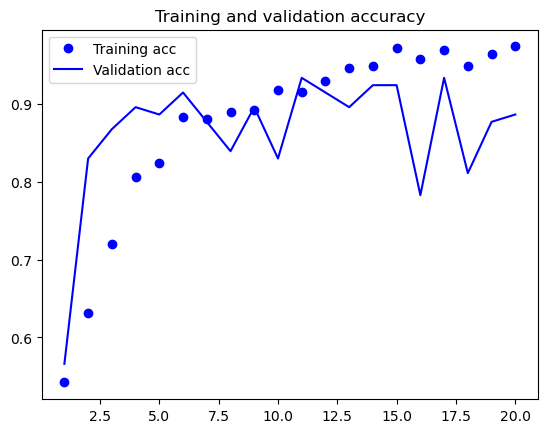

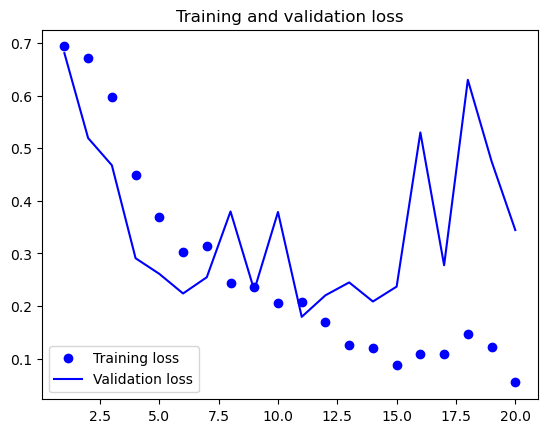

In [106]:
# plotting the accuracy, validation accuracy and loss, validation loss over the 20 epochs

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing the model on a single image

In [126]:
# checking for a single image prediction

from tensorflow.keras.preprocessing import image
import numpy as np

#preprocesses the image(make it ready in the desired form)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0
    return img

In [159]:
img_path = r"C:\Users\Hamza\Downloads\Machine Learning Projects\Lungs Cancer Detection Using CNN\lung_cancer_dataset\splitted_data\validation\negative\negative_245.jpeg"
img = preprocess_image(img_path)
prediction = model.predict(img)
if prediction>= 0.5:
    print('Lung Cancer, confidence score', prediction)
else: 
    print('Normal')

1/1 [==============================] - 0s 308ms/step
Normal


In [95]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('lungs_cancer_detector.h5')

In [129]:
# generating the classification report 

# predictions on test data
predictions = model.predict(test_generator)

4/4 [==============================] - 3s 559ms/step


In [131]:
predictions.shape

(106, 1)

In [133]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

In [134]:
# classification report

from sklearn.metrics import classification_report

true_labels = test_generator.classes 

binary_predictions = (predictions >= 0.5).astype(int)

report = classification_report(true_labels, binary_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.93      0.80      0.86        46

    accuracy                           0.89       106
   macro avg       0.89      0.88      0.88       106
weighted avg       0.89      0.89      0.89       106



In [139]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
print("Class labels assigned by the generator:", test_generator.class_indices)


Class labels assigned by the generator: {'negative': 0, 'positive': 1}


In [148]:
# Calculate the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[57  3]
 [ 9 37]]


In [156]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, binary_predictions)

print('F1_score is: ', f1)

F1_score is:  0.8604651162790697


In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the confusion matrix
confusion_matrix = [[57, 3], [9, 37]]

# Extract TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]

# Calculate Accuracy
accuracy = accuracy_score(true_labels, binary_predictions)

# Calculate Precision
precision = precision_score(true_labels, binary_predictions)

# Calculate Recall (Sensitivity)
recall = recall_score(true_labels, binary_predictions)

# Calculate F1 Score
f1 = f1_score(true_labels, binary_predictions)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8867924528301887
Precision: 0.925
Recall: 0.8043478260869565
F1 Score: 0.8604651162790697
